# Bayesian Optimization On SVM Hyper-paramter C

/home/rahuls/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:78: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


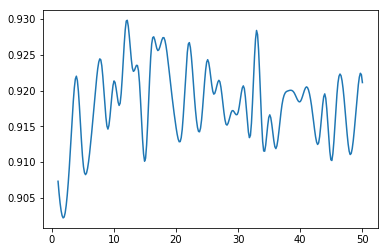

In [46]:
from bayes_opt import BayesianOptimization
import numpy as np


from sklearn import svm
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
from scipy.interpolate import spline
import csv
import random
import math
import operator

def load_dataset(f_name,split, train_set=[], test_set=[]):
    with open(f_name, newline='') as csvfile:
        lines = csv.reader(csvfile, delimiter=',', quotechar='|')
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(24):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                train_set.append(dataset[x])
            else:
                test_set.append(dataset[x])

def clr(x):
    y = []
    for i in x:
        c = 0
        for j in i:
            c += 1
            if c == 25:
                y.append(j)
                i.remove(j)
                
    return y,x

def acc(test_label, prediction):
    c=0
    for x in range(len(test_label)):
        if test_label[x] == prediction[x]:
            c += 1

    accuracy = c/(float(len(test_label)))
    return accuracy

def supvecm(c):
    prediction = []
    train_set = []
    test_set = []
    split = 0.67
    train_label = []
    test_label = []
    load_dataset('sensor_readings_24.csv', split, train_set,test_set)
    train_label, train_set = clr(train_set)
    test_label, test_set = clr (test_set)
    clf = svm.SVC(C=c)
    clf.fit(train_set,train_label)
    prediction = clf.predict(test_set)
    
    accuracy = acc(test_label, prediction)
    return accuracy
    

    
    
x=[]
y=[]
for i in range(1,51):
    x.append(i)
    y.append(supvecm(i))

m = np.array(x)
n = np.array(y)

x_smooth = np.linspace(m.min(),m.max(),300).reshape(-1,1)
y_smooth = spline(m,n,x_smooth)
plt.plot(x_smooth,y_smooth)


In [47]:
bo = BayesianOptimization(supvecm,{'c':(1,50)})
bo.maximize(init_points=2, n_iter=0, acq='ei')

Initialization
-----------------------------------------
 Step |   Time |      Value |         c | 
    1 | 00m01s |    0.91989 |   40.0037 | 
    2 | 00m00s |    0.92478 |   15.2572 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 


In [48]:
def posterior(bo, x, xmin=1, xmax=10):
    xmin, xmax = 1, 10
    bo.gp.fit(bo.X, bo.Y)
    mu, sigma = bo.gp.predict(x, return_std=True)
    return mu, sigma

def plot_gp(bo, x, y):
    
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('Gaussian Process and Utility Function After {} Steps'.format(len(bo.X)), fontdict={'size':30})
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    mu, sigma = posterior(bo, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(bo.X.flatten(), bo.Y, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((1, 50))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility = bo.util.utility(x, bo.gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((1, 50))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    
    

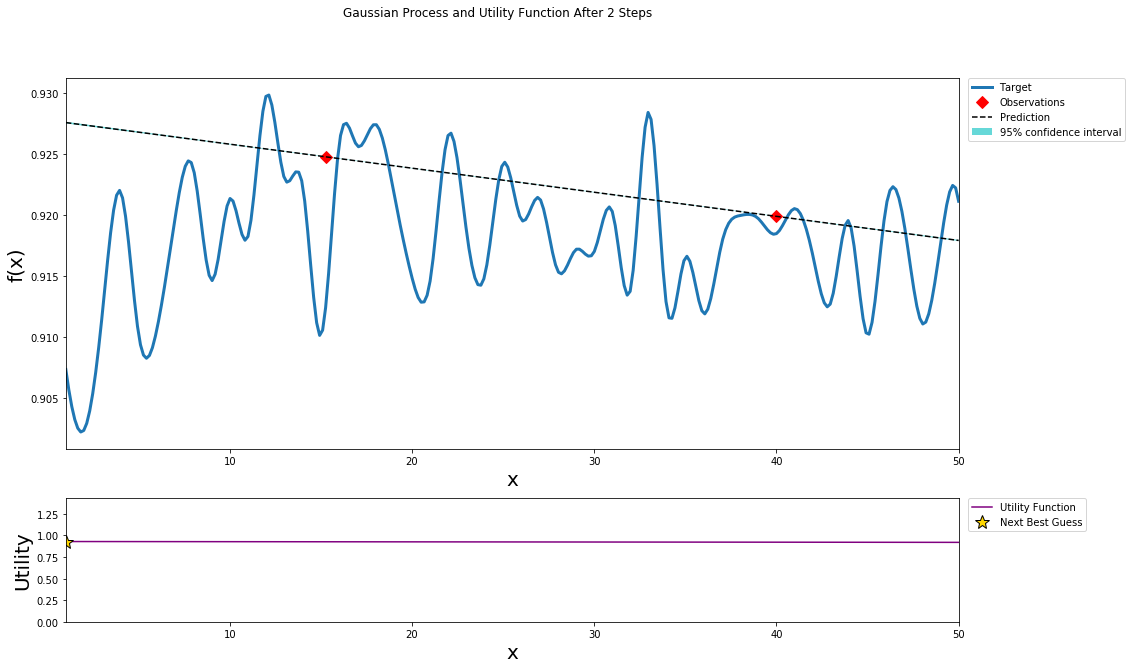

In [49]:
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
    3 | 00m05s |    0.88692 |    1.0000 | 


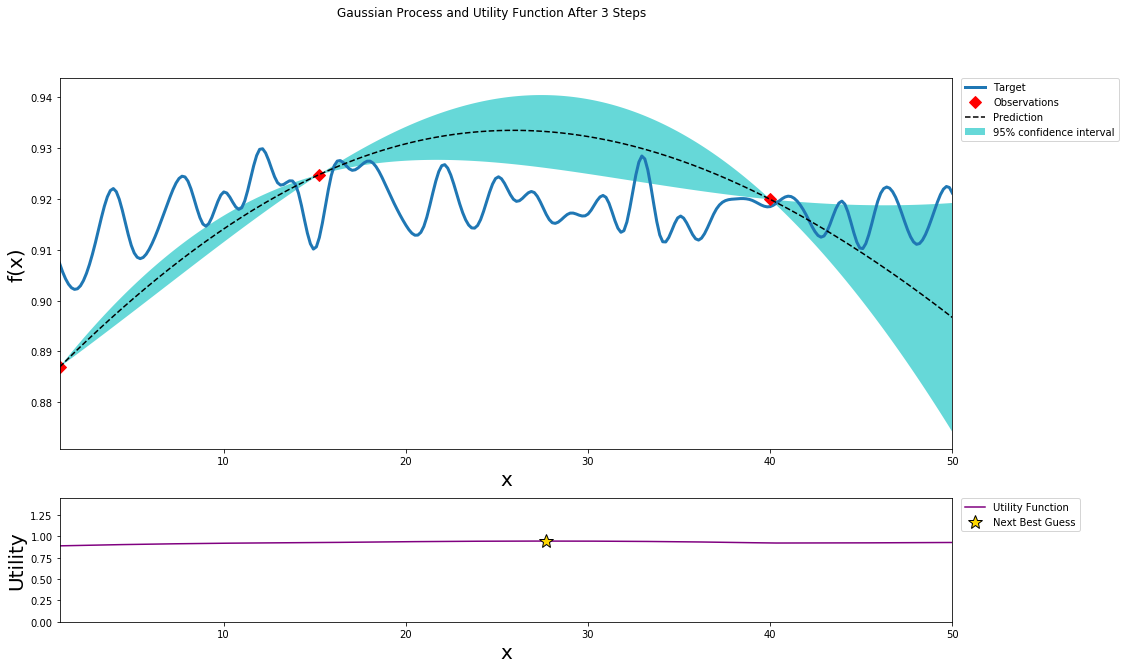

In [50]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
    4 | 00m04s |    0.92308 |   27.6997 | 


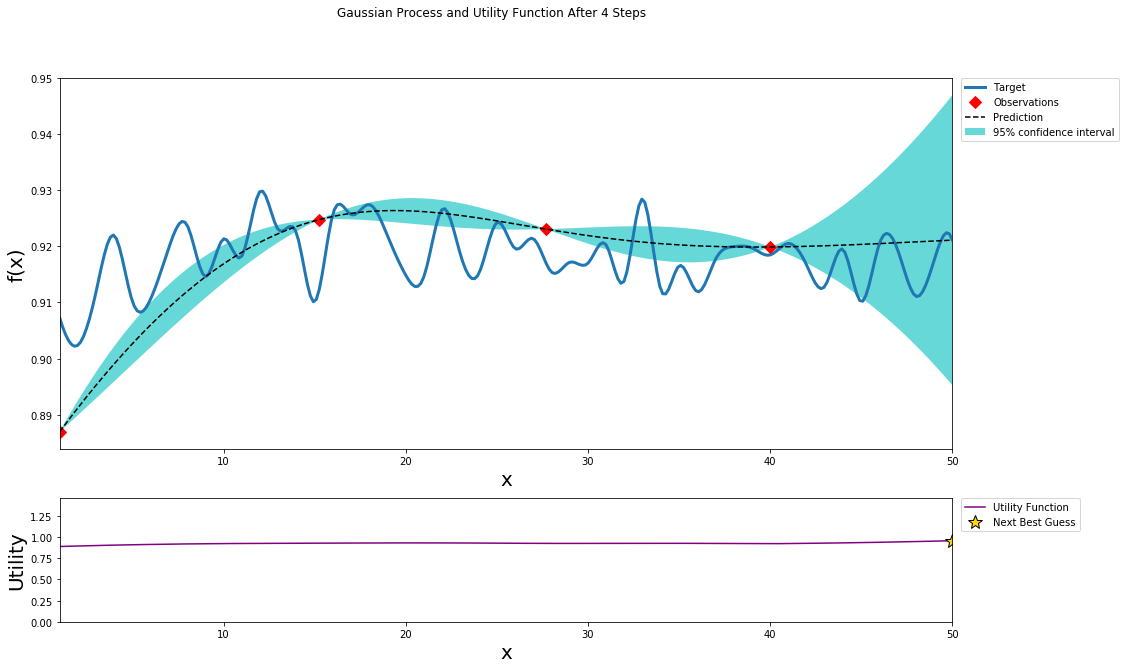

In [51]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
    5 | 00m07s |    0.91750 |   50.0000 | 


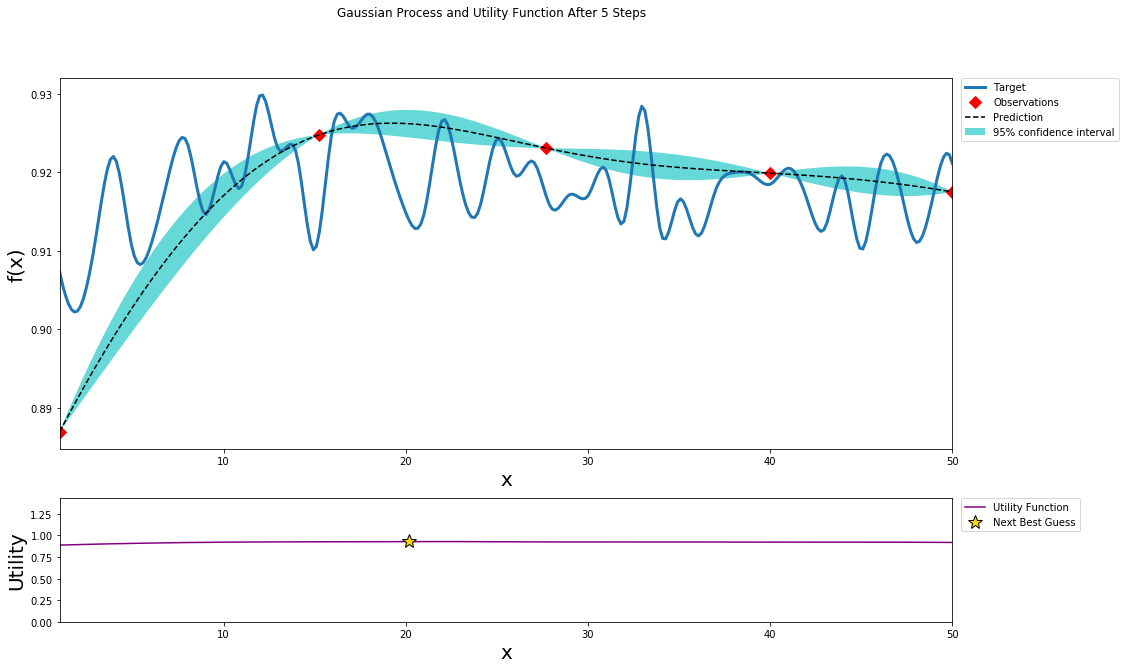

In [52]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
    6 | 00m11s |    0.92204 |   20.2219 | 


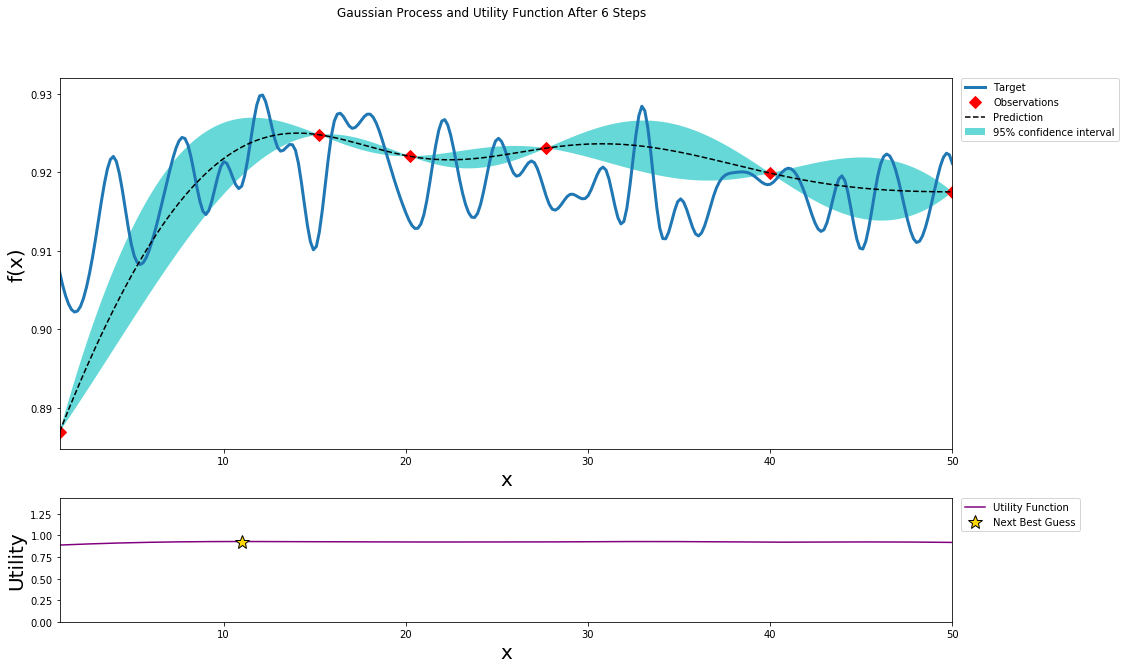

In [53]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.94405211e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
    7 | 00m10s |    0.92720 |   10.9955 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


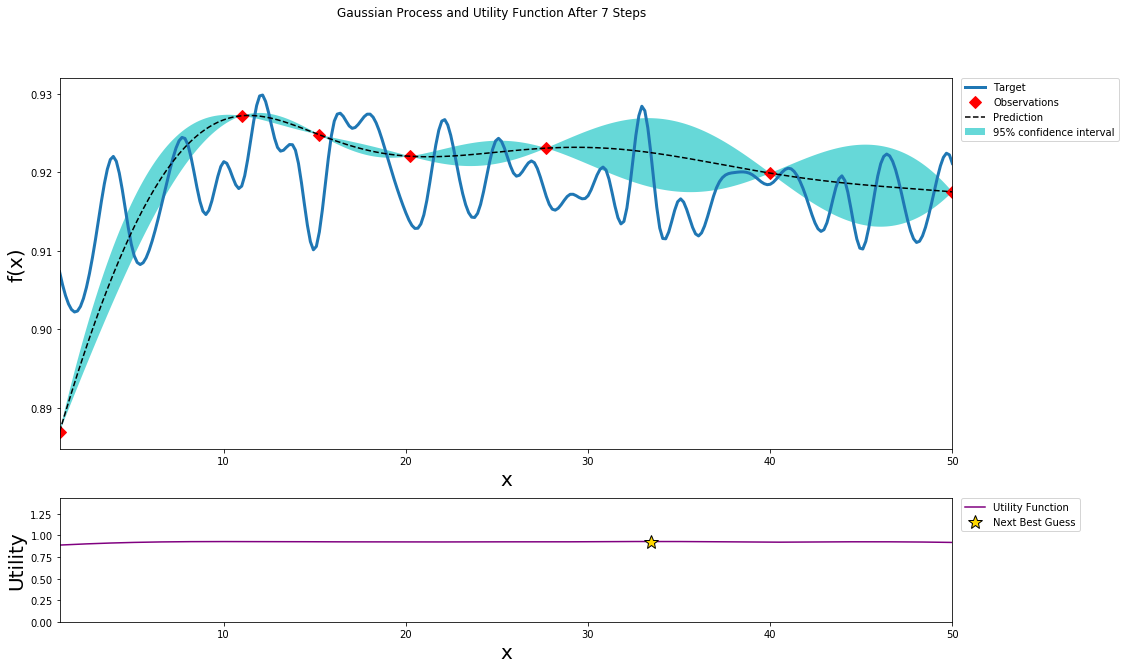

In [54]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
    8 | 00m10s |    0.91845 |   33.5073 | 


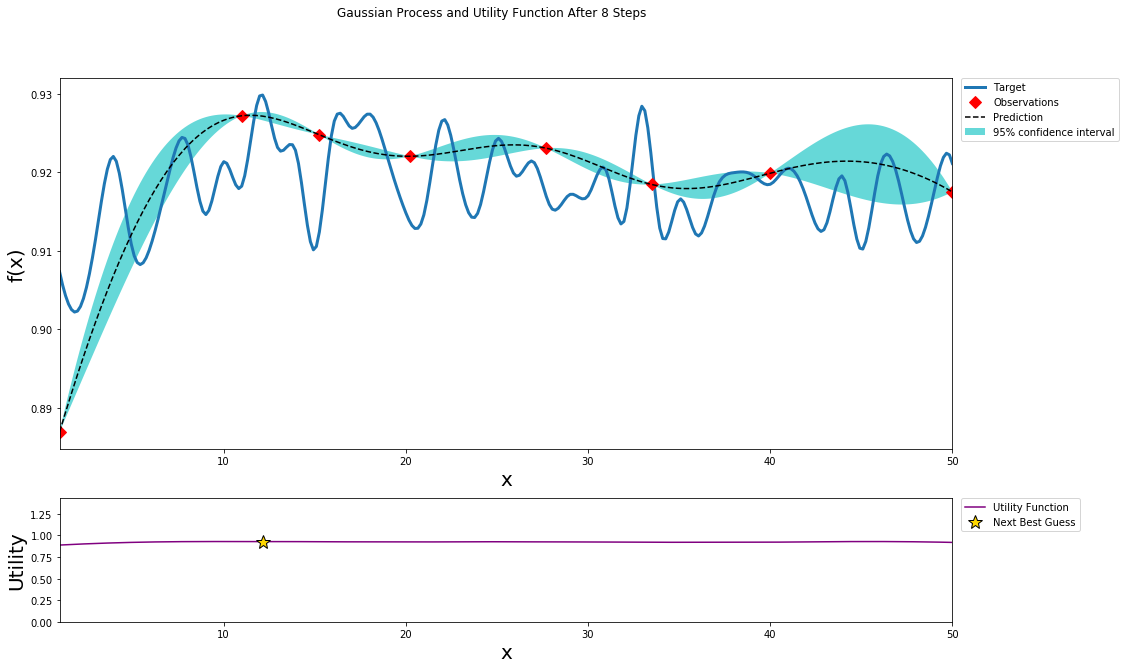

In [55]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
    9 | 00m10s |    0.91612 |   12.1835 | 


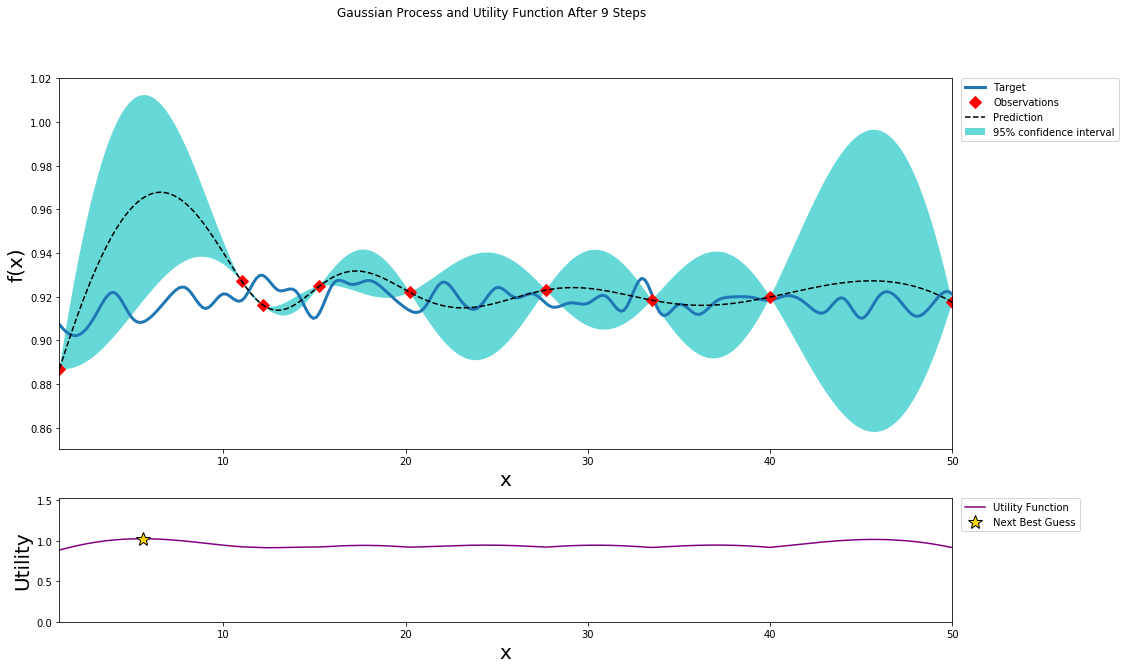

In [56]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
   10 | 00m05s |    0.92446 |    5.5190 | 


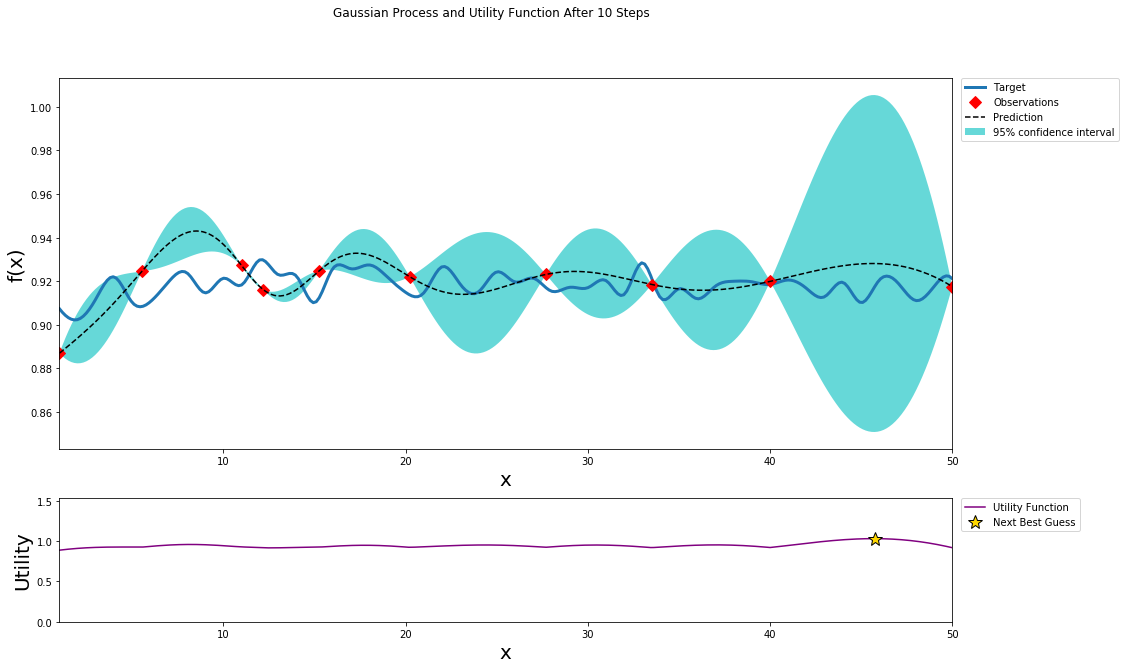

In [57]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
   11 | 00m05s |    0.91836 |   45.6859 | 


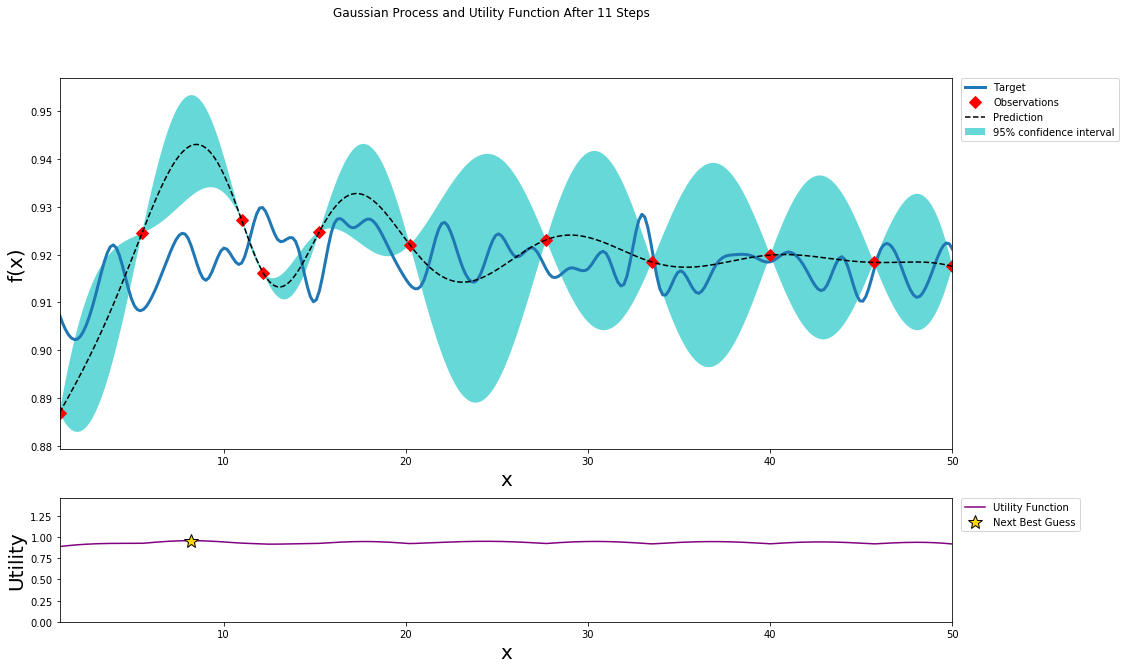

In [58]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
   12 | 00m05s |    0.92663 |    8.1956 | 


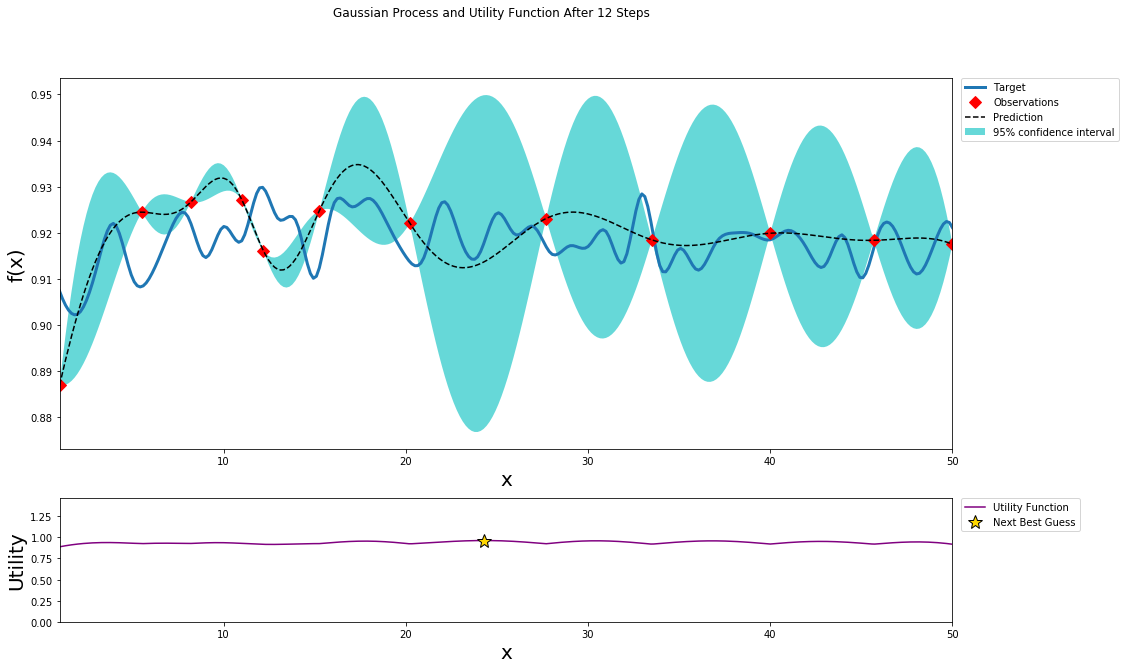

In [59]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
   13 | 00m06s |    0.91582 |   24.3069 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([4.0904717e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 46, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


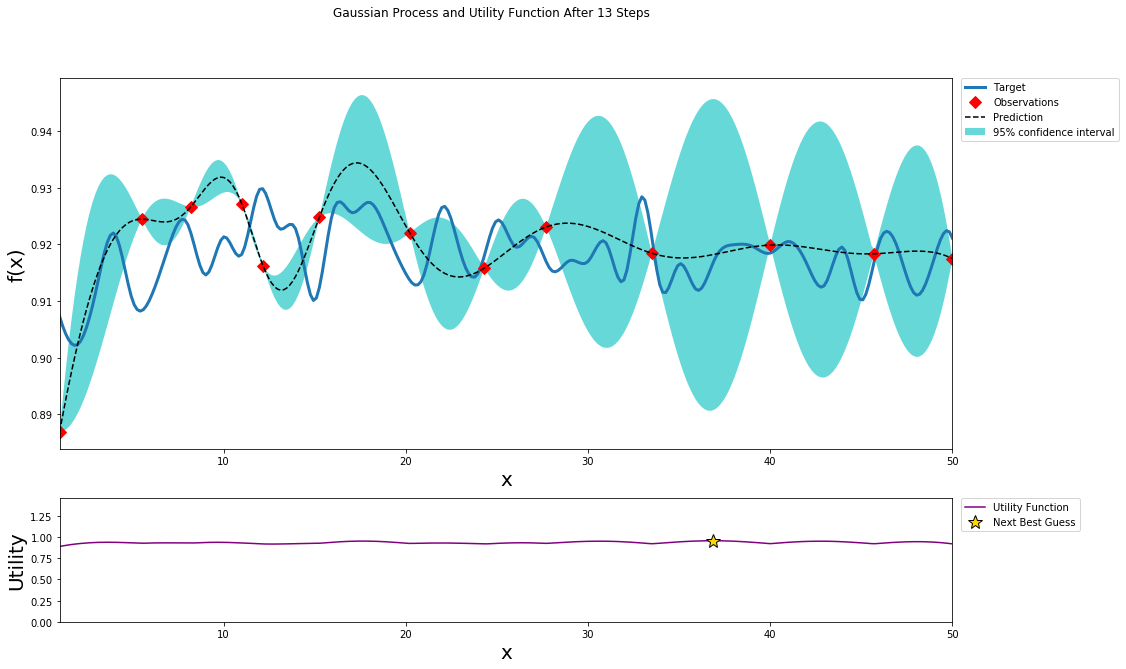

In [60]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
   14 | 00m05s |    0.91081 |   36.8508 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-5.92353699e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


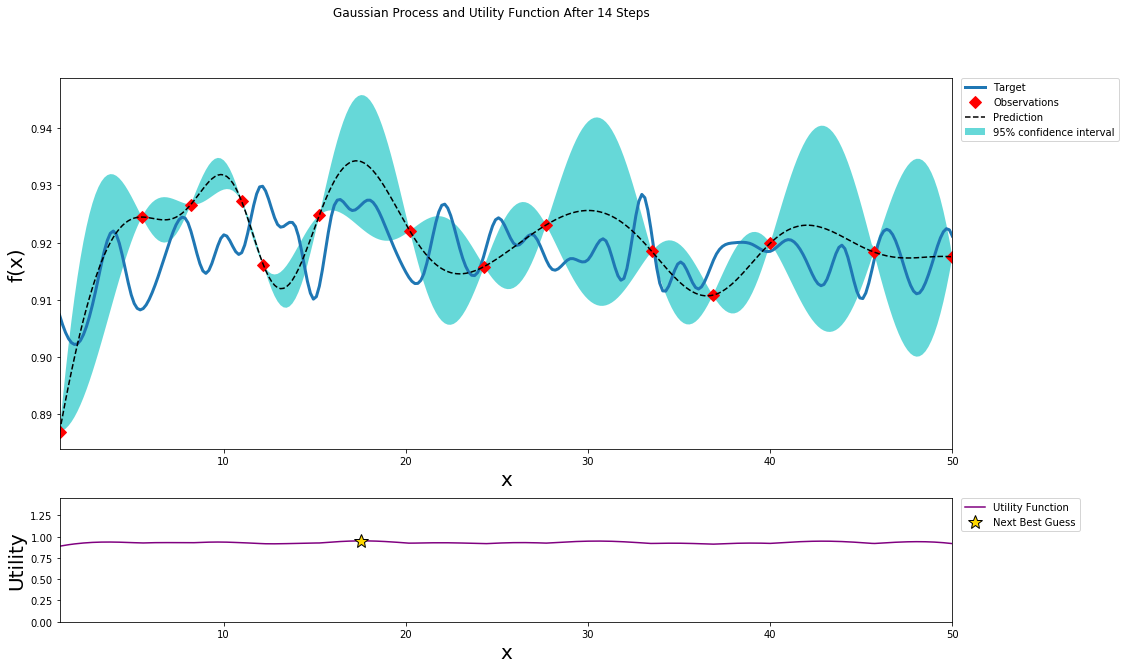

In [61]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
   15 | 00m06s |    0.91332 |   17.6270 | 


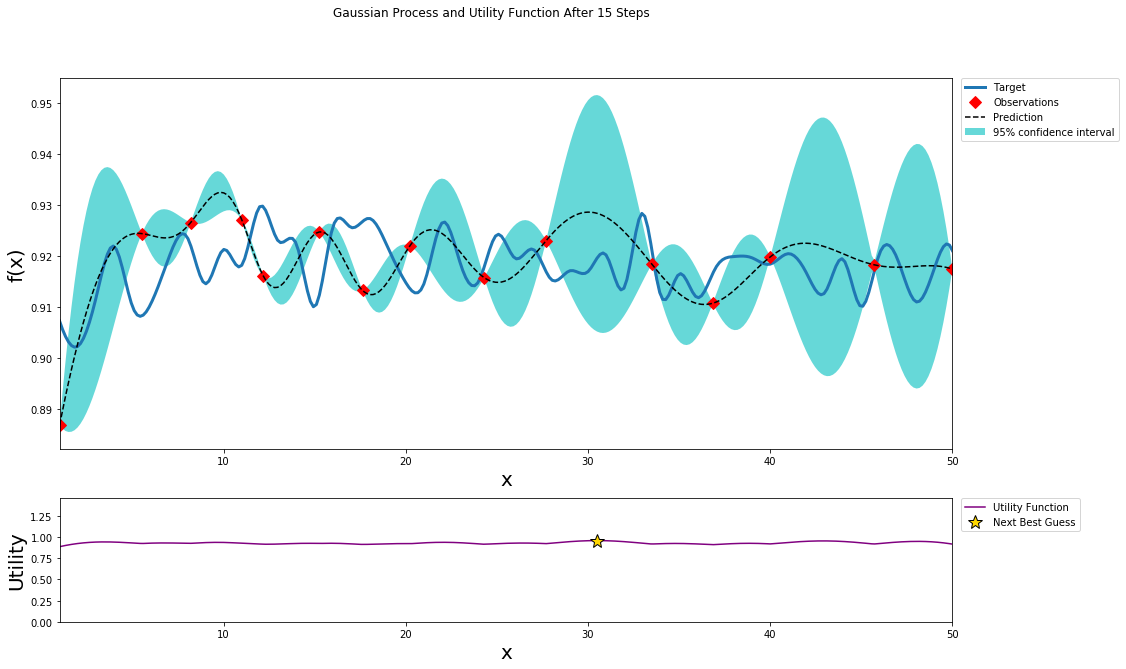

In [62]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
   16 | 00m06s |    0.91525 |   30.4933 | 


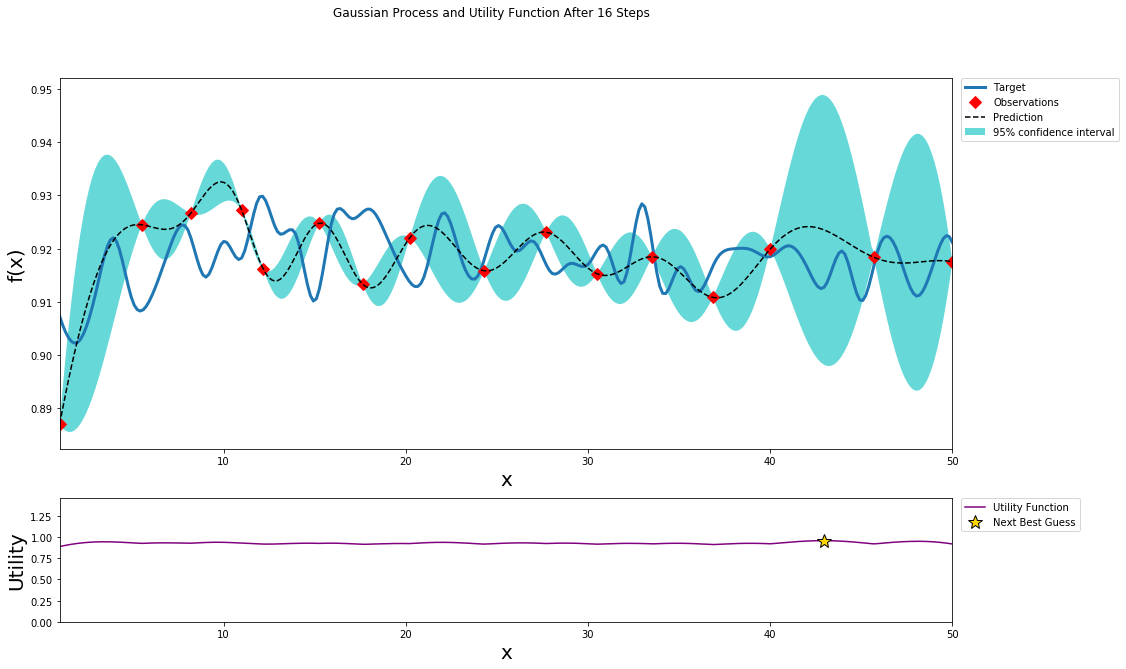

In [63]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
   17 | 00m06s |    0.91644 |   42.9022 | 


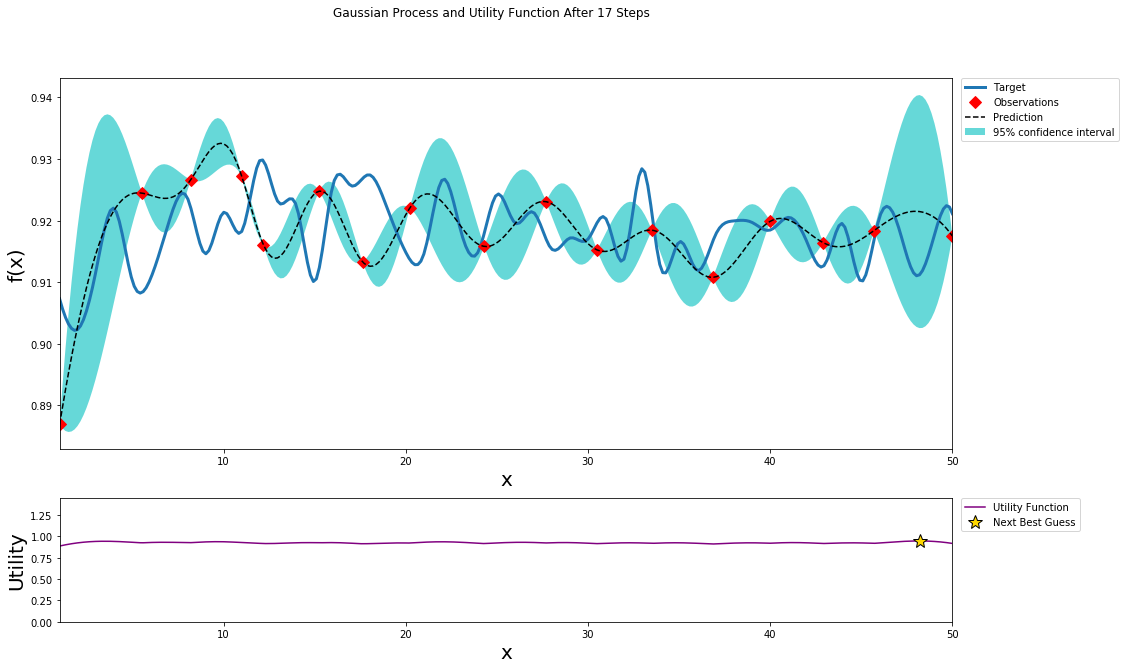

In [64]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
   18 | 00m06s |    0.91766 |   48.1794 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.2437147e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 58, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


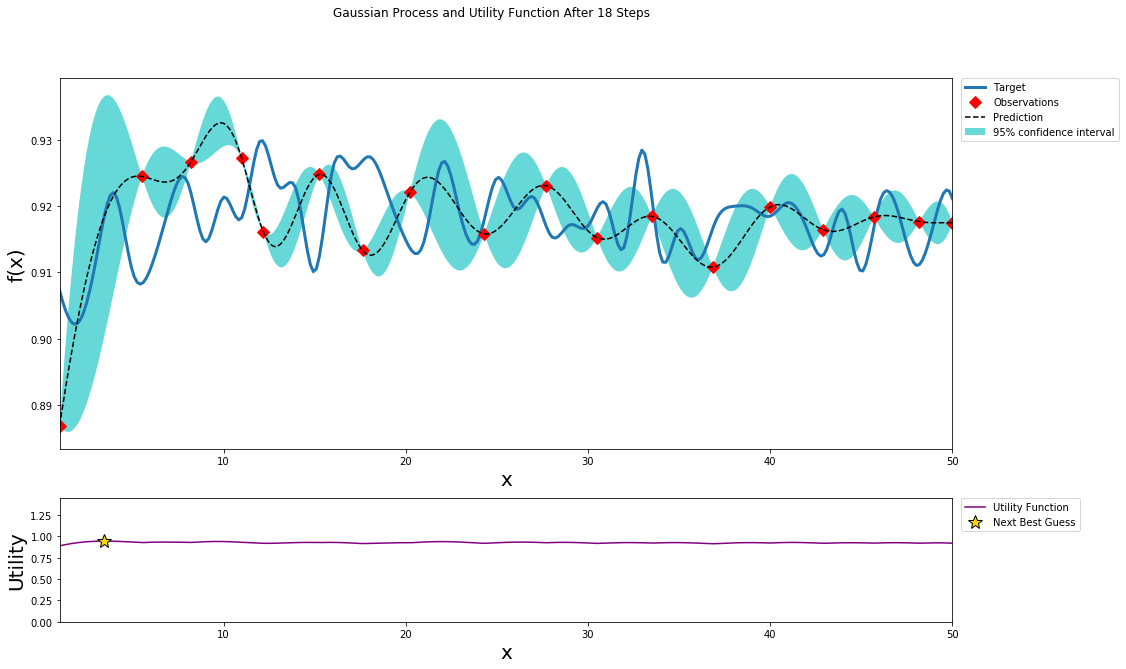

In [65]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
   19 | 00m07s |    0.90747 |    3.4906 | 


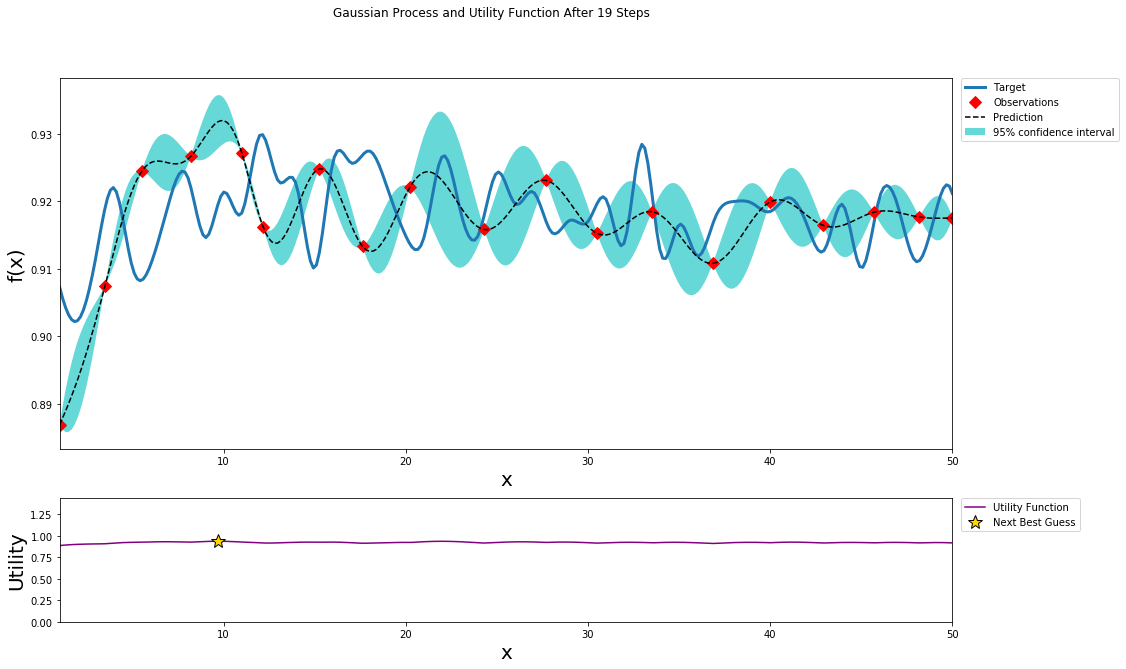

In [66]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
   20 | 00m08s |    0.91624 |    9.7093 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00011791]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3.45574263e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


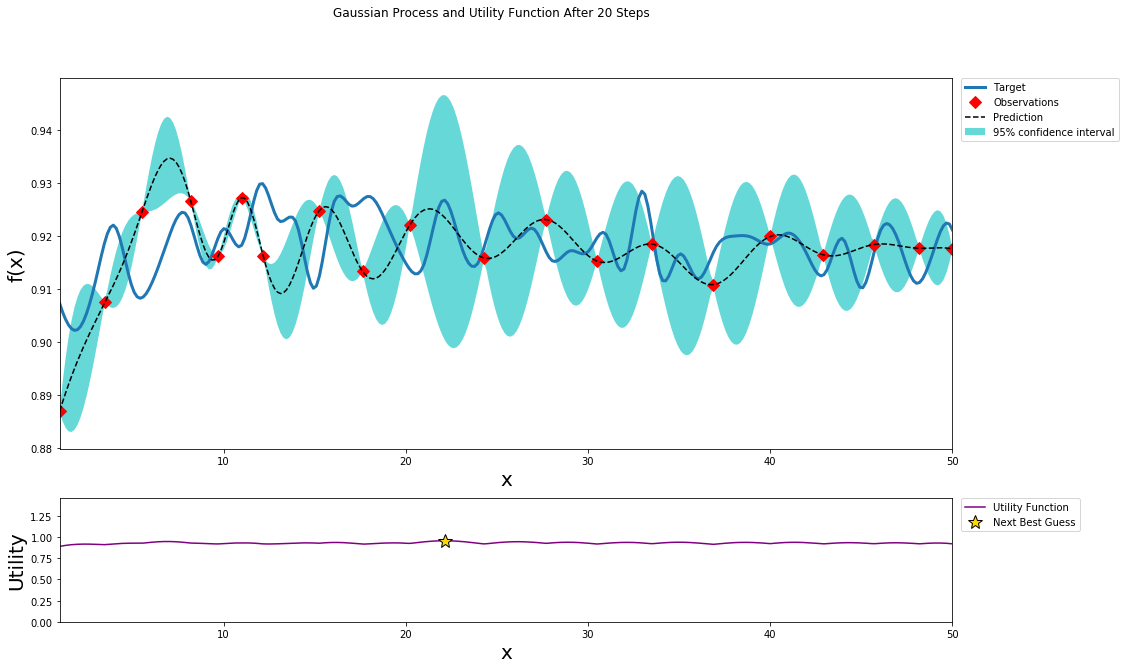

In [67]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
   21 | 00m06s |    0.92312 |   22.1354 | 


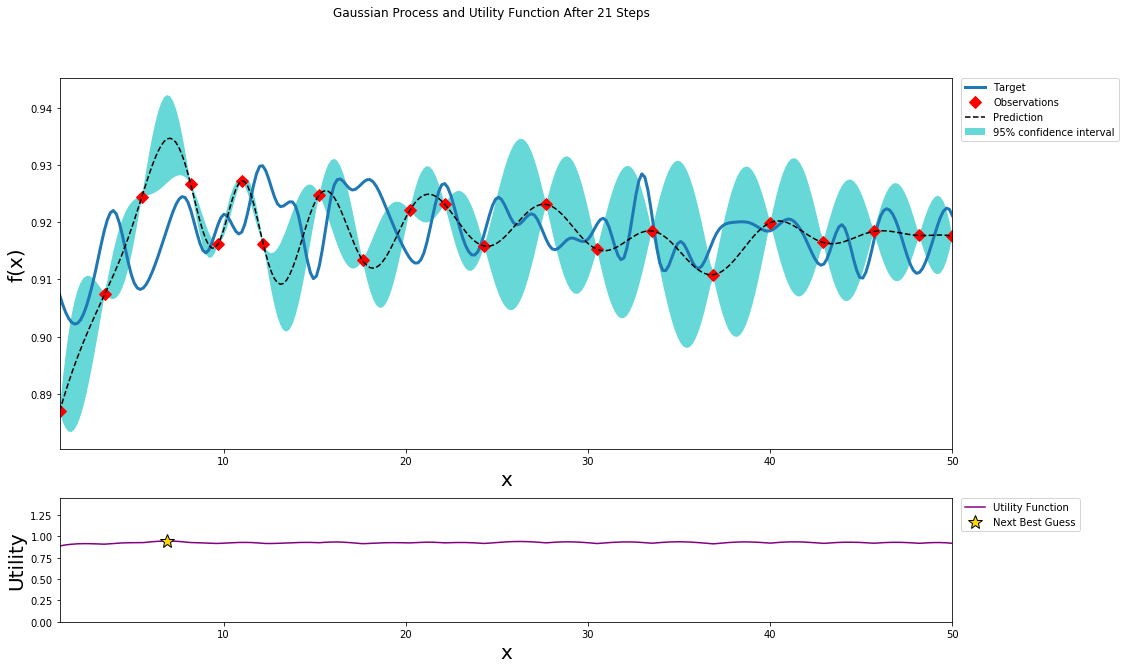

In [68]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.98221385e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         c | 
   22 | 00m07s |    0.91867 |    6.9076 | 


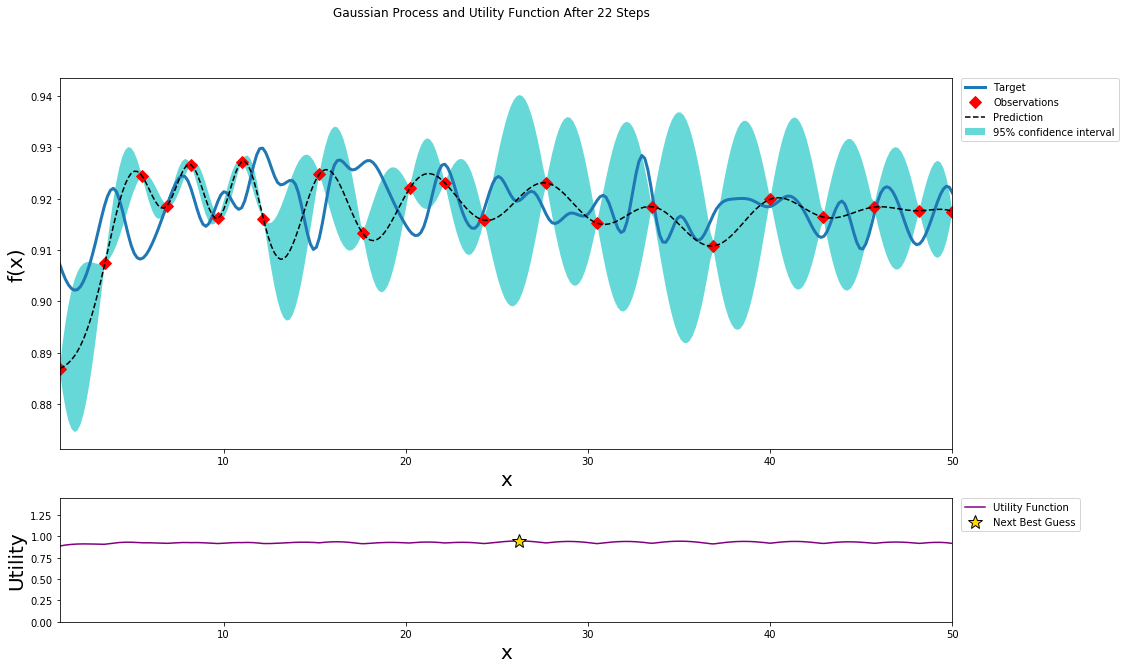

In [69]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

In [70]:
print(bo.res['max'])

{'max_val': 0.9272030651340997, 'max_params': {'c': 10.995496626423192}}
